In [1]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri)
filmes.head()

filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [0]:
from sklearn.cluster import KMeans

In [7]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')

Grupos [1 1 2 ... 2 1 2]


In [8]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.34174941 -0.27380692 -0.23519333 -0.26176096 -0.56624266
   0.91866805 -0.21327094  0.10660126 -0.16723244  0.2961725   0.43844299
  -0.07291404 -0.17638272  0.67712789 -0.31600324  0.07185114  1.43790933
  -0.12303544 -0.04095276]
 [-0.05917995  0.76792272  1.62627988  1.2568895   1.14456924 -0.13466991
  -0.30653031 -0.21096006 -0.57984161  0.9949545  -0.09492563 -0.23930399
   0.56934917  0.18044772 -0.15777854 -0.27960724  0.67758218 -0.25142281
  -0.0553178  -0.05371881]
 [ 0.03716548 -0.3196691  -0.29640067 -0.22008116 -0.18225925  0.24922629
  -0.27493097  0.13336625  0.1022553  -0.18144489 -0.08959668 -0.10828743
  -0.11252127  0.0228144  -0.21944512  0.1894813  -0.19443013 -0.48661403
 

In [9]:
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.341749,-0.273807,-0.235193,-0.261761,-0.566243,0.918668,-0.213271,0.106601,-0.167232,0.296172,0.438443,-0.072914,-0.176383,0.677128,-0.316003,0.071851,1.437909,-0.123035,-0.040953
1,-0.059180,0.767923,1.626280,1.256890,1.144569,-0.134670,-0.306530,-0.210960,-0.579842,0.994955,-0.094926,-0.239304,0.569349,0.180448,-0.157779,-0.279607,0.677582,-0.251423,-0.055318,-0.053719
2,0.037165,-0.319669,-0.296401,-0.220081,-0.182259,0.249226,-0.274931,0.133366,0.102255,-0.181445,-0.089597,-0.108287,-0.112521,0.022814,-0.219445,0.189481,-0.194430,-0.486614,0.060575,0.028865


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7940639390>,
      dtype=object)

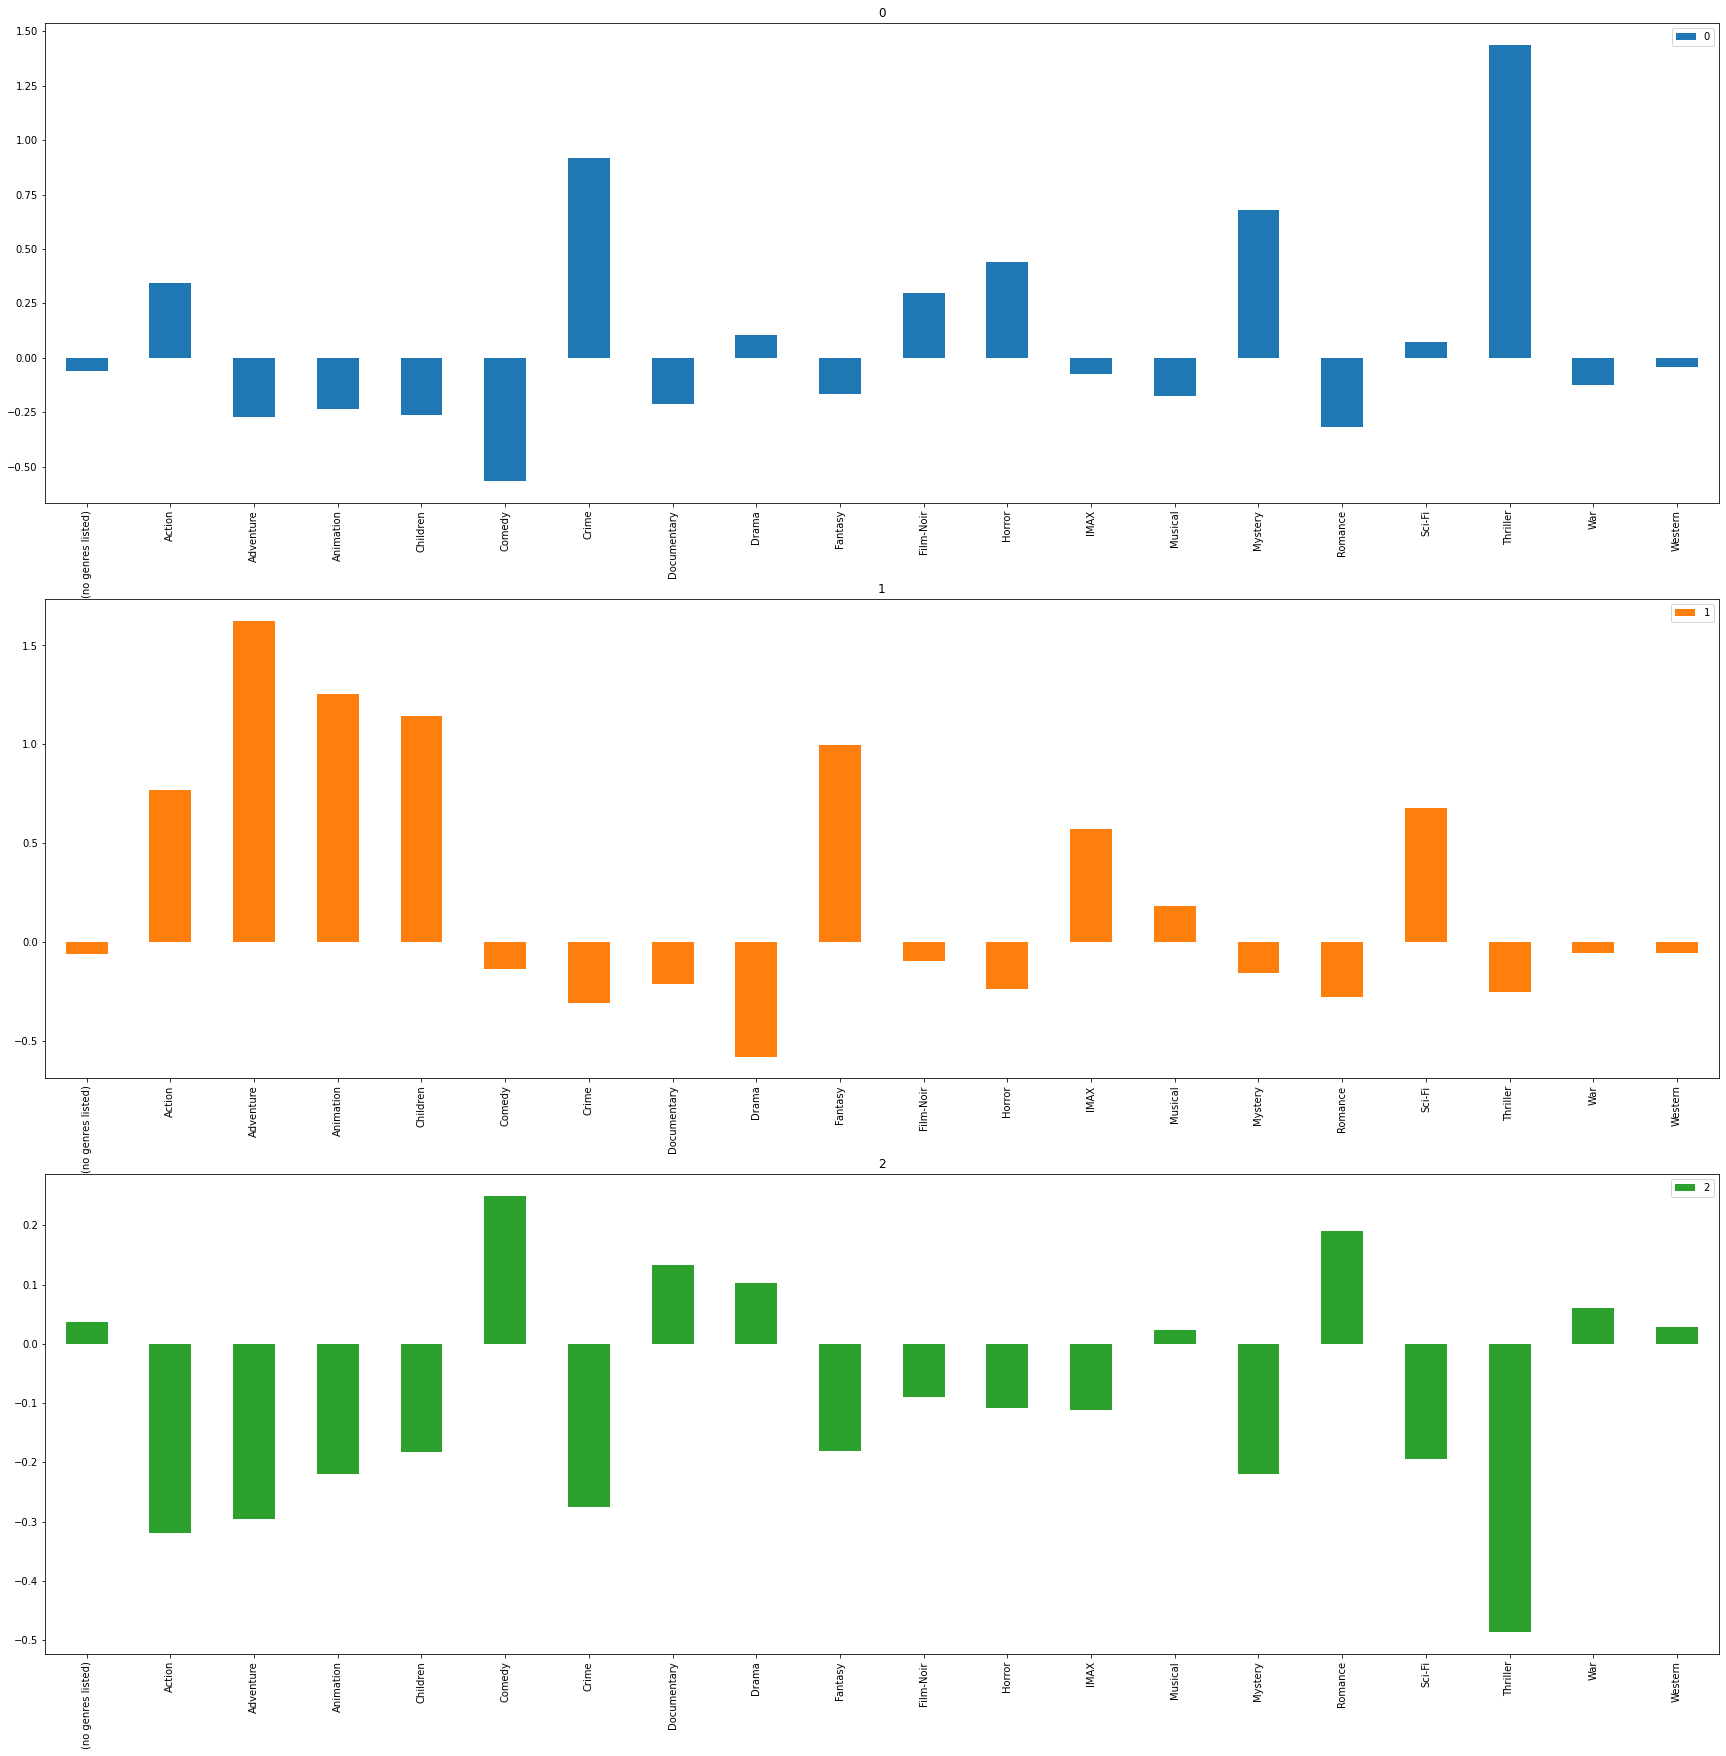

In [10]:
grupos.transpose().plot.bar(subplots=True,
                figsize=(30,30),
                sharex=False)

In [11]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4670,6975,Funny Games (1997),Drama|Horror|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
8257,104908,Insidious: Chapter 2 (2013),Horror|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4247,6193,Poolhall Junkies (2002),Comedy|Drama|Thriller,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5729,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
7658,88593,"Yellow Sea, The (a.k.a. The Murderer) (Hwangha...",Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5953,34397,"Order, The (2001)",Action|Adventure|Drama|Thriller,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5917,33794,Batman Begins (2005),Action|Crime|IMAX,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1320,1779,Sphere (1998),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2374,3150,"War Zone, The (1999)",Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3567,4885,Domestic Disturbance (2001),Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#from sklearn.datasets import make_blobs
#dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
#dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
#dados.head()

In [0]:
#import matplotlib.pyplot as plt

#plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [0]:
#modelo = KMeans(n_clusters=3)
#grupos = modelo.fit_predict(dados)
#plt.scatter(x=dados.coluna1, y=dados.coluna2, 
#            c=grupos,
#           cmap='viridis')

In [0]:
#centroides = modelo.cluster_centers_
#plt.scatter(dados.coluna1, dados.coluna2,
#            c=grupos,
#           cmap='viridis')
#plt.scatter(centroides[:, 0], centroides[:, 1],
#           marker='X', s=169, linewidths=5,
#           color='g', zorder=8)


In [0]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  7.0802283,  59.8707   ],
       [-47.885983 , -53.106647 ],
       [ 19.400793 ,  20.773182 ],
       ...,
       [ -3.479039 ,   7.673088 ],
       [  3.3877   ,  40.17327  ],
       [ 24.85444  , -20.73828  ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


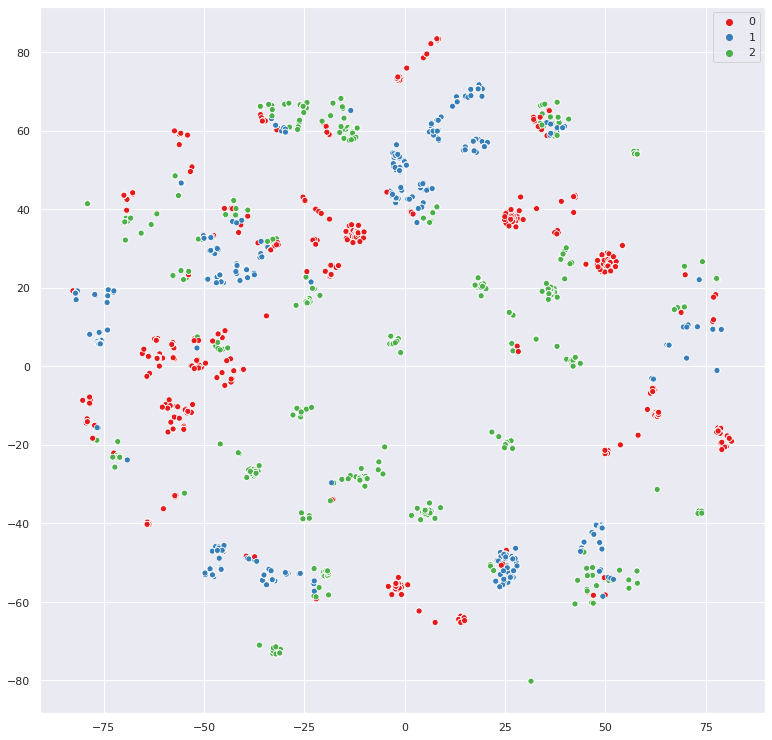

In [17]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f793bd44470>,
      dtype=object)

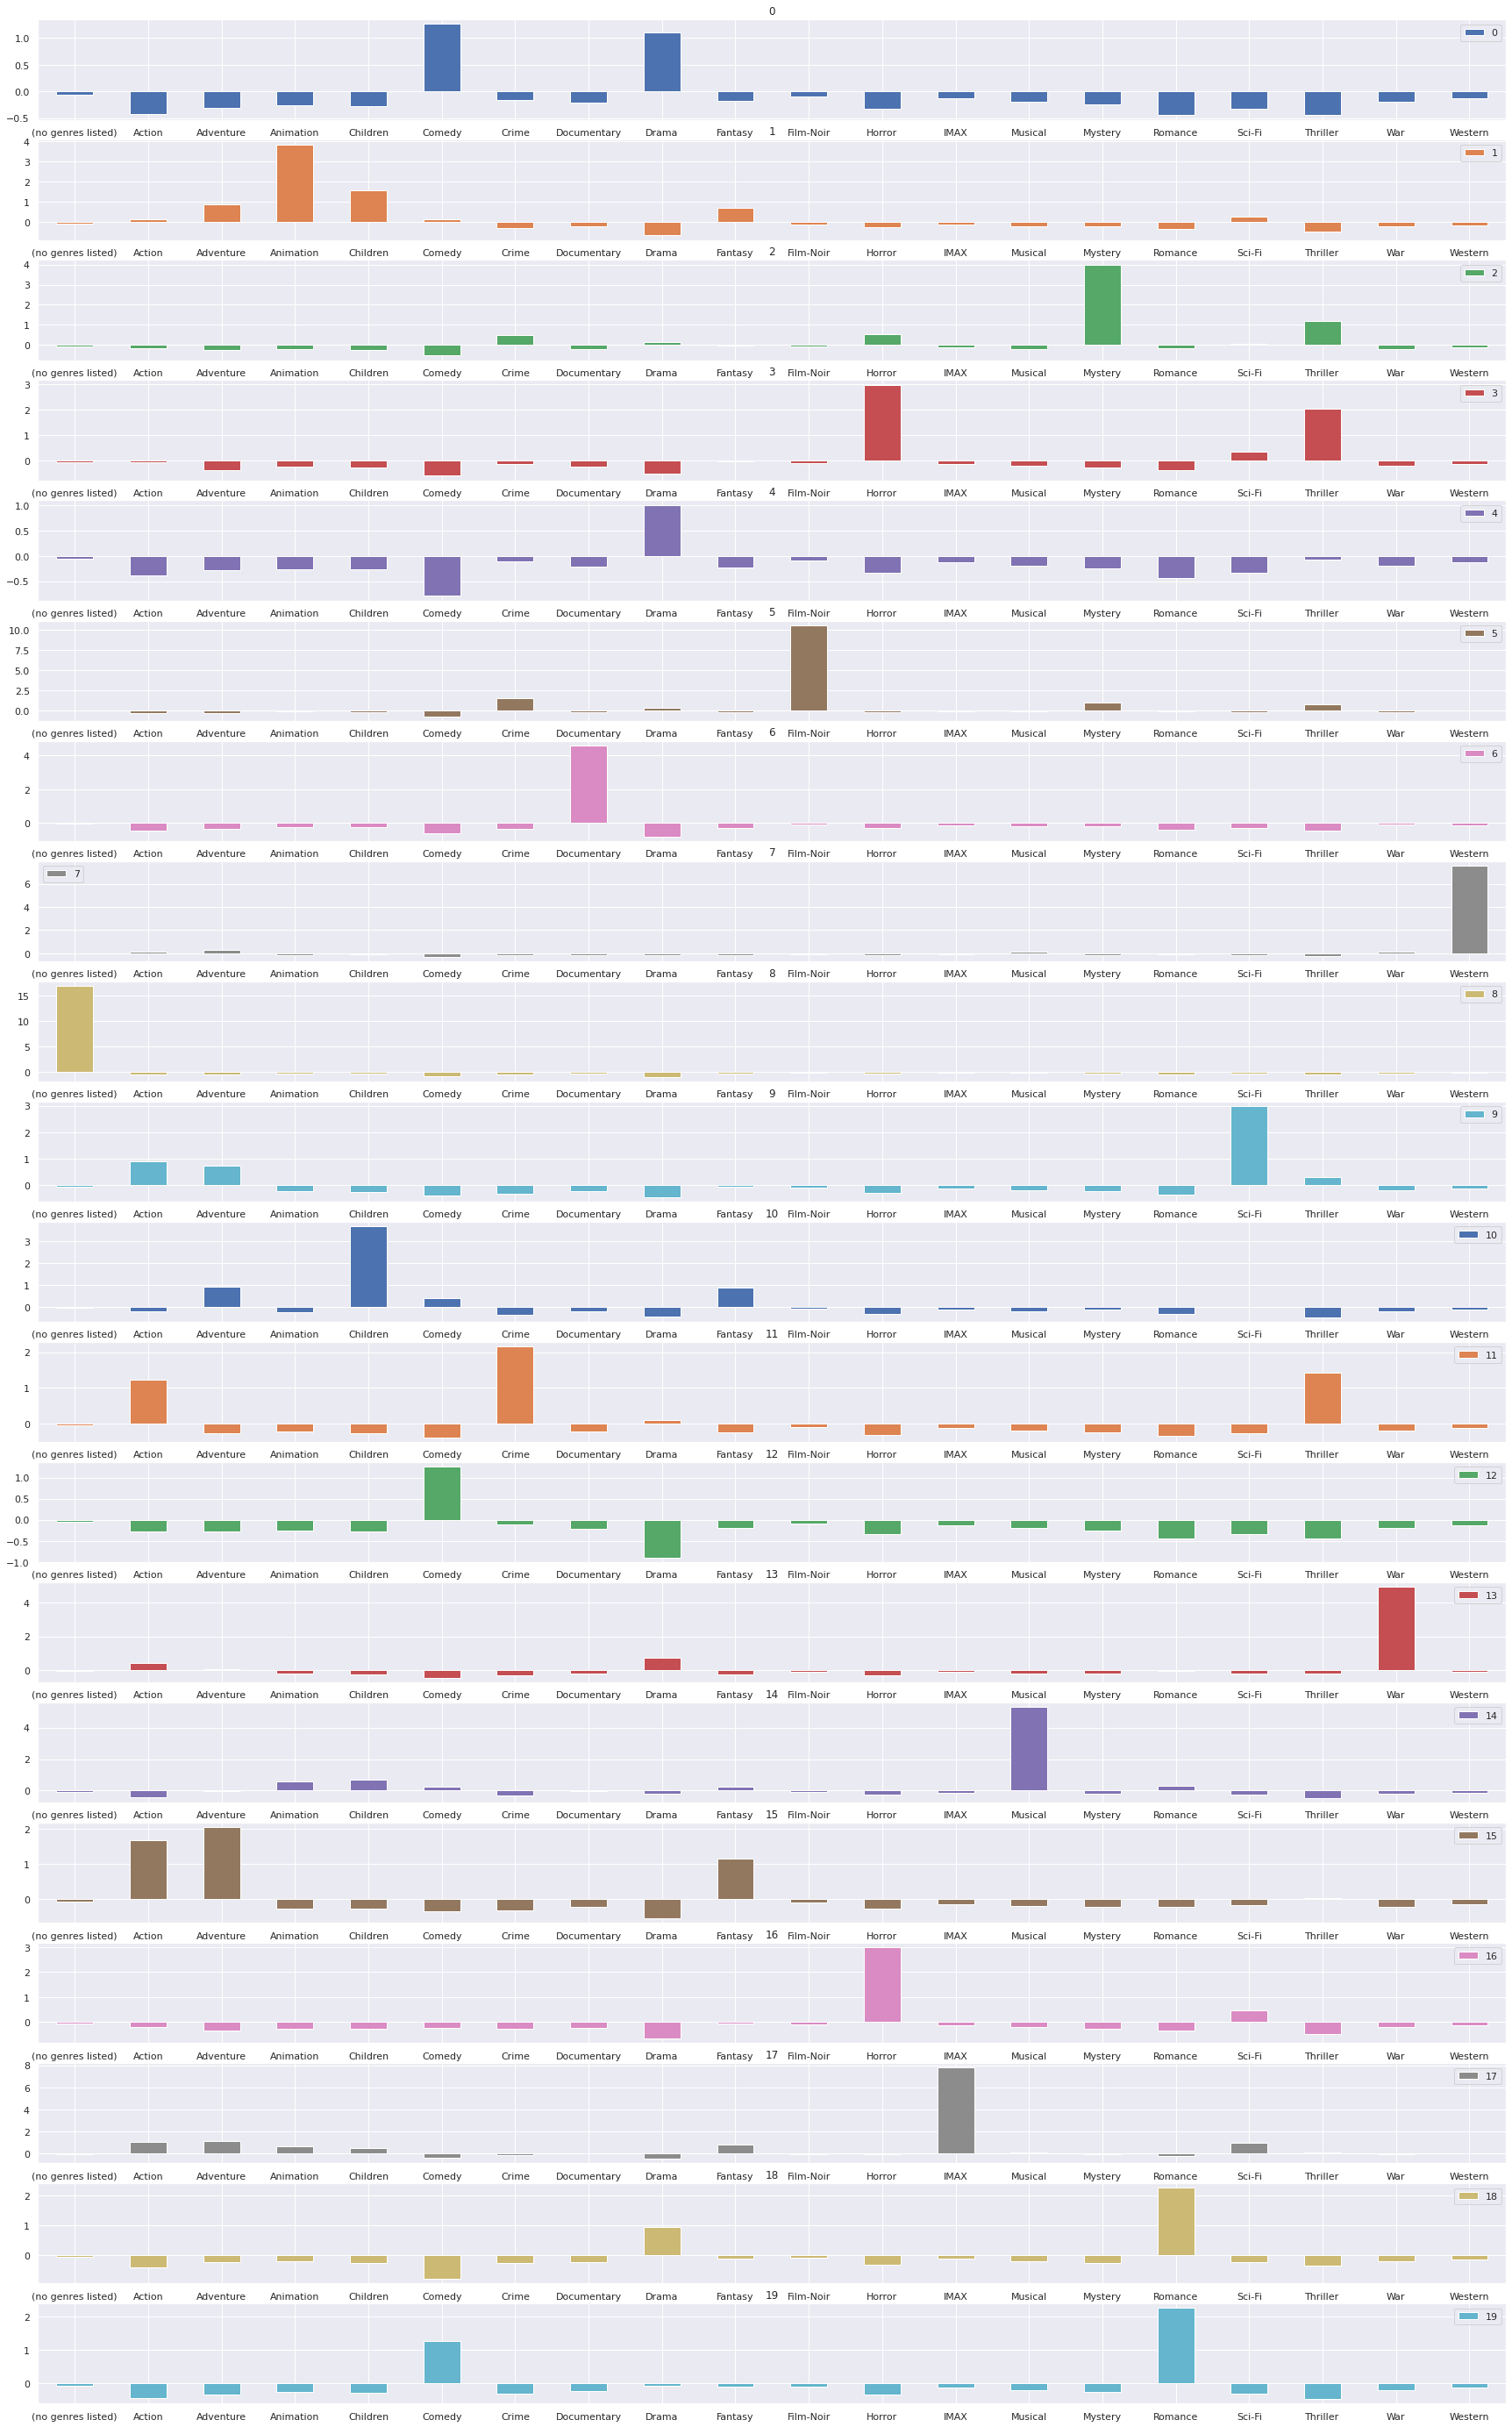

In [20]:
modelo = KMeans(n_clusters = 20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(30,50),
                sharex=False,
                rot=0)

In [21]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7352,78349,Exam (2009),Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5801,31737,Bunny Lake Is Missing (1965),Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8760,128512,Paper Towns (2015),Drama|Mystery|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
6203,45361,"American Haunting, An (2005)",Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
5272,8670,"Testament of Dr. Mabuse, The (Das Testament de...",Crime|Horror|Mystery|Thriller,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
5327,8860,Cellular (2004),Action|Crime|Drama|Mystery|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
3674,5062,Seconds (1966),Mystery|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4925,7382,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
5030,7832,"Thin Man Goes Home, The (1945)",Comedy|Crime|Mystery,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5861,32728,"Little Girl Who Lives Down the Lane, The (1976)",Drama|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [23]:
kmeans(20, generos_escalados)

[20, 55033.275082599765]